In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('fake_job_postings.csv')

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.shape

(17880, 18)

In [5]:
df.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

,fraudulent,title
0,0,17014
1,1,866


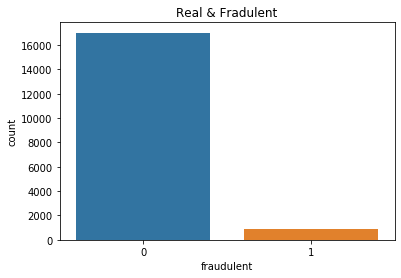

In [6]:
#Fraud and Real visualization
sn.countplot(df.fraudulent).set_title('Real & Fradulent')
df.groupby('fraudulent').count()['title'].reset_index().sort_values(by='title',ascending=False)

In [7]:
df.drop(['job_id'], axis=1, inplace=True)

In [8]:
df.isna().sum()/ len(df)

title                  0.000000
location               0.019351
department             0.645805
salary_range           0.839597
company_profile        0.185011
description            0.000056
requirements           0.150727
benefits               0.403244
telecommuting          0.000000
has_company_logo       0.000000
has_questions          0.000000
employment_type        0.194128
required_experience    0.394295
required_education     0.453300
industry               0.274217
function               0.361018
fraudulent             0.000000
dtype: float64

In [9]:
df2=df.copy()

Drop the 'department','salary_range' and 'benefits' from dataset,based on the previews results .  

In [10]:
df2.drop(['salary_range', 'department', 'benefits'], axis = 1, inplace = True)

In [11]:
df2.head()

,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


Sort the values based on the title and reindex the rows. 

In [12]:
df2 = df2.sort_values('title').reset_index(drop = True)

In [27]:
#df2.head()

In [13]:
df2.isna().sum()

title                     0
location                346
company_profile        3308
description               1
requirements           2695
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
dtype: int64

Fill the NAs based on the Backward filling which means fill missing values with next data point.

In [14]:
df2['employment_type'] = df2['employment_type'].bfill(axis=0)
df2['required_experience'] = df2['required_experience'].bfill(axis=0)
df2['required_education'] = df2['required_education'].bfill(axis = 0)
df2['industry'] = df2['industry'].bfill(axis=0)
df2['function'] = df2['function'].bfill(axis=0)

In [15]:
df2.isna().sum()

title                     0
location                346
company_profile        3308
description               1
requirements           2695
telecommuting             0
has_company_logo          0
has_questions             0
employment_type           2
required_experience       2
required_education        2
industry                  2
function                  2
fraudulent                0
dtype: int64

In [16]:
df3= df2.copy()

In [17]:
df3['requirements'].fillna("NoRequirements", inplace=True)
df3['company_profile'].fillna("NoCompanyProfile", inplace=True)

In [18]:
df3['description'] = df3['requirements']+' '+df3['company_profile']+' '+df3['description'] 
df3.drop(['company_profile'], axis=1, inplace=True)
df3.drop(['requirements'], axis=1, inplace=True)

In [19]:
df3.isna().sum()

title                    0
location               346
description              1
telecommuting            0
has_company_logo         0
has_questions            0
employment_type          2
required_experience      2
required_education       2
industry                 2
function                 2
fraudulent               0
dtype: int64

In [20]:
df3.shape

(17880, 12)

In [21]:
df4 = df3.copy()

In [22]:
df4 = df4[df4['description'].notna()]

In [23]:
df4.isna().sum()

title                    0
location               346
description              0
telecommuting            0
has_company_logo         0
has_questions            0
employment_type          2
required_experience      2
required_education       2
industry                 2
function                 2
fraudulent               0
dtype: int64

Drop other NAs in any way and also drop the duplicates.  

In [24]:
df4 = df4.dropna(axis = 0, how = 'any')

In [25]:
df4.shape

(17531, 12)

In [26]:
df4 = df4.drop_duplicates(keep = 'first')

In [27]:
df5 = df4.copy()

In [28]:
df5.shape

(17225, 12)

In [29]:
df5.head()

,title,location,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Electrician,"US, NY, Niagara Falls",NoRequirements Niacet is a leading producer of...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Chemicals,Manufacturing,0
1,Environmental Technician I,"US, TX, Houston",Minimum Requirements: HS diploma0-2 years of r...,0,0,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1
2,Piping Material Engineer,"US, TX, Houston",Qualifications &amp; personal attributes• High...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1
3,"Discipline Manager Civil, Structural, Marine...","US, TX, Houston","EXPERIENCE: - Good awareness of construction,t...",0,1,0,Full-time,Entry level,Professional,Oil & Energy,Engineering,1
4,FEA Senior engineer,"US, TX, Houston",Qualifications &amp; personal attributes• MSc ...,0,1,0,Full-time,Entry level,Master's Degree,Oil & Energy,Engineering,1


In [30]:
df5.shape

(17225, 12)

,fraudulent,title
0,0,16391
1,1,834


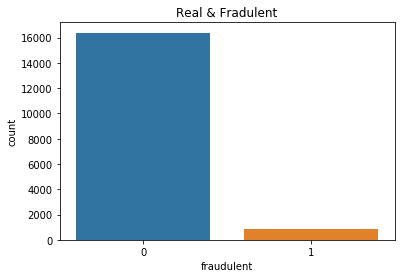

In [31]:
#Fraud and Real visualization
sn.countplot(df5.fraudulent).set_title('Real & Fradulent')
df5.groupby('fraudulent').count()['title'].reset_index().sort_values(by='title',ascending=False)

Merging description','requirements' and 'company_profile' features and droping two of them. 

In [32]:
df5['country_code'] = df5['location'].str.split(',', expand=True)[0]
#df5['city'] = df5['location'].str.split(',', expand = True)[2]
#df5.loc[df5['city'] == ' ', 'city'] = np.nan
#df5.drop(['city'], axis = 1, inplace = True)
df5.drop(['location'], axis = 1, inplace = True)

In [33]:
df5

,title,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country_code
0,Electrician,NoRequirements Niacet is a leading producer of...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Chemicals,Manufacturing,0,US
1,Environmental Technician I,Minimum Requirements: HS diploma0-2 years of r...,0,0,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1,US
2,Piping Material Engineer,Qualifications &amp; personal attributes• High...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1,US
3,"Discipline Manager Civil, Structural, Marine...","EXPERIENCE: - Good awareness of construction,t...",0,1,0,Full-time,Entry level,Professional,Oil & Energy,Engineering,1,US
4,FEA Senior engineer,Qualifications &amp; personal attributes• MSc ...,0,1,0,Full-time,Entry level,Master's Degree,Oil & Energy,Engineering,1,US
...,...,...,...,...,...,...,...,...,...,...,...,...
17873,warehouse Clerical/Superusers,Working pattern - 4 days on / 4 days off (incl...,0,0,0,Full-time,Mid-Senior level,Unspecified,Warehousing,Administrative,0,GB
17874,warehouse first line manager/ Shift Manager,Working pattern - 4 days on / 4 days off (incl...,0,0,0,Full-time,Mid-Senior level,Vocational,Warehousing,Management,0,GB
17875,warehouse opperative,Working pattern - any 5 days from 7 (including...,0,0,0,Full-time,Mid-Senior level,Vocational,Warehousing,Other,0,GB
17876,web designer,PhotoshopBootstrapGit eproductions interactive...,0,1,0,Full-time,Mid-Senior level,Vocational,Internet,Financial Analyst,0,GR


Text(0.5, 0, 'Countries')

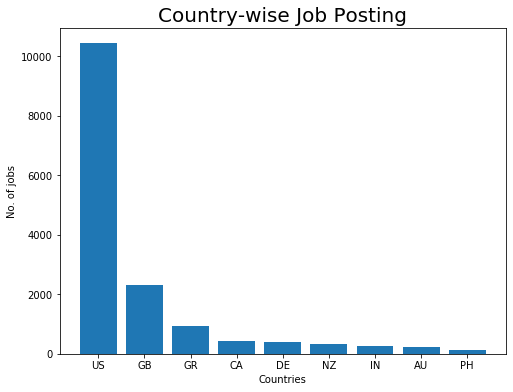

In [34]:
country = dict(df5.country_code.value_counts()[:9])
plt.figure(figsize=(8,6))
plt.title('Country-wise Job Posting', size=20)
plt.bar(country.keys(), country.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

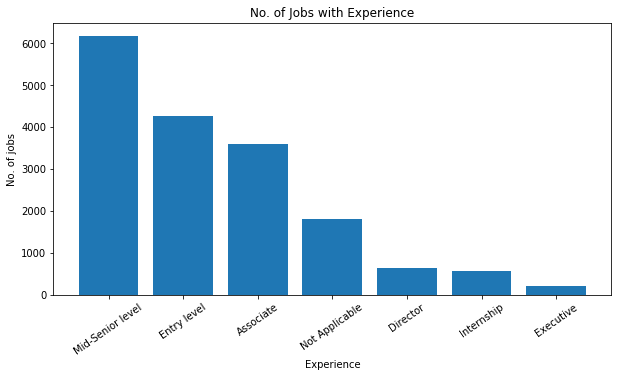

In [35]:
#Visualize the required experiences in the jobs
experience = dict(df5.required_experience.value_counts())

plt.figure(figsize=(10,5))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [36]:
df5.isnull().sum()

title                  0
description            0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
country_code           0
dtype: int64

Split the location feature to city and country.and drop the location.  

In [38]:
df5.head()

,title,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country_code
0,Electrician,NoRequirements Niacet is a leading producer of...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Chemicals,Manufacturing,0,US
1,Environmental Technician I,Minimum Requirements: HS diploma0-2 years of r...,0,0,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1,US
2,Piping Material Engineer,Qualifications &amp; personal attributes• High...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1,US
3,"Discipline Manager Civil, Structural, Marine...","EXPERIENCE: - Good awareness of construction,t...",0,1,0,Full-time,Entry level,Professional,Oil & Energy,Engineering,1,US
4,FEA Senior engineer,Qualifications &amp; personal attributes• MSc ...,0,1,0,Full-time,Entry level,Master's Degree,Oil & Energy,Engineering,1,US


In [39]:
import pycountry
list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)]
def country(df):
    if df['country_code'] in list_alpha_2:
        return pycountry.countries.get(alpha_2 = df['country_code']).name
df5['country_name'] = df5.apply(country, axis = 1)
df5.drop(['country_code'], axis = 1, inplace = True)

In [40]:
df5.shape

(17225, 12)

In [41]:
df_clean = df5.copy()

In [42]:
df_clean.shape

(17225, 12)

In [43]:
df_clean.head()

,title,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country_name
0,Electrician,NoRequirements Niacet is a leading producer of...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Chemicals,Manufacturing,0,United States
1,Environmental Technician I,Minimum Requirements: HS diploma0-2 years of r...,0,0,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1,United States
2,Piping Material Engineer,Qualifications &amp; personal attributes• High...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Oil & Energy,Engineering,1,United States
3,"Discipline Manager Civil, Structural, Marine...","EXPERIENCE: - Good awareness of construction,t...",0,1,0,Full-time,Entry level,Professional,Oil & Energy,Engineering,1,United States
4,FEA Senior engineer,Qualifications &amp; personal attributes• MSc ...,0,1,0,Full-time,Entry level,Master's Degree,Oil & Energy,Engineering,1,United States


In [44]:
df_clean.isnull().sum()

title                  0
description            0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
country_name           0
dtype: int64

In [45]:
df_clean.to_csv('CleanData2.csv')

In [46]:

df_clean.shape

(17225, 12)